In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
filenya = files.upload()

Saving exams.csv to exams.csv


In [25]:
df = pd.read_csv('exams.csv') 
df.head()

,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
0,ART HISTORY,5,897.0,1260.0,815.0,1889.0,1631.0,34,321.0,514.0,5,5,154.0,2704.0
1,ART HISTORY,4,1835.0,2608.0,1800.0,3787.0,3290.0,132,918.0,877.0,13,8,273.0,5587.0
2,ART HISTORY,3,2311.0,3282.0,2283.0,4657.0,3898.0,287,1347.0,992.0,19,10,307.0,6940.0
3,ART HISTORY,2,2252.0,3248.0,2374.0,4494.0,3211.0,450,1972.0,809.0,15,21,280.0,6868.0
4,ART HISTORY,1,901.0,1352.0,1072.0,1699.0,942.0,307,1074.0,292.0,13,10,87.0,2771.0


In [26]:
df.drop(['Exam Subject', 'Score', 'Students (Hispanic/Latino)','Students (White)','Students (Black)', 'Students (Asian)', 'Students (American Indian/Alaska Native)', 'Students (Native Hawaiian/Pacific Islander)'], axis=1, inplace=True)
df.head()

,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (Two or More Races),All Students (2016)
0,897.0,1260.0,815.0,1889.0,154.0,2704.0
1,1835.0,2608.0,1800.0,3787.0,273.0,5587.0
2,2311.0,3282.0,2283.0,4657.0,307.0,6940.0
3,2252.0,3248.0,2374.0,4494.0,280.0,6868.0
4,901.0,1352.0,1072.0,1699.0,87.0,2771.0


In [27]:
df.dropna(inplace=True)
data = df.reset_index(drop=True)
data

,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (Two or More Races),All Students (2016)
0,897.00,1260.00,815.00,1889.0,154.00,2704.0
1,1835.00,2608.00,1800.00,3787.0,273.00,5587.0
2,2311.00,3282.00,2283.00,4657.0,307.00,6940.0
3,2252.00,3248.00,2374.00,4494.0,280.00,6868.0
4,901.00,1352.00,1072.00,1699.0,87.00,2771.0
...,...,...,...,...,...,...
254,6545.00,2420.00,39591.00,42884.0,4002.00,82475.0
255,5339.00,1994.00,33795.00,47281.0,3847.00,81076.0
256,2863.00,1452.00,21091.00,34966.0,2268.00,56057.0
257,20642.00,8204.00,125991.00,155455.0,13176.00,281446.0


In [28]:
data

,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (Two or More Races),All Students (2016)
0,897.00,1260.00,815.00,1889.0,154.00,2704.0
1,1835.00,2608.00,1800.00,3787.0,273.00,5587.0
2,2311.00,3282.00,2283.00,4657.0,307.00,6940.0
3,2252.00,3248.00,2374.00,4494.0,280.00,6868.0
4,901.00,1352.00,1072.00,1699.0,87.00,2771.0
...,...,...,...,...,...,...
254,6545.00,2420.00,39591.00,42884.0,4002.00,82475.0
255,5339.00,1994.00,33795.00,47281.0,3847.00,81076.0
256,2863.00,1452.00,21091.00,34966.0,2268.00,56057.0
257,20642.00,8204.00,125991.00,155455.0,13176.00,281446.0


In [29]:
df_scale = data.copy()

scaler = StandardScaler()

df_scale = scaler.fit_transform(df_scale)
len(df_scale)

259

In [30]:
data = pd.DataFrame(df_scale)
data.columns = df.columns

data_cluster = data.copy()
data.head()
data.shape

(259, 6)

**K-Means**

Text(0, 0.5, 'Inertia')

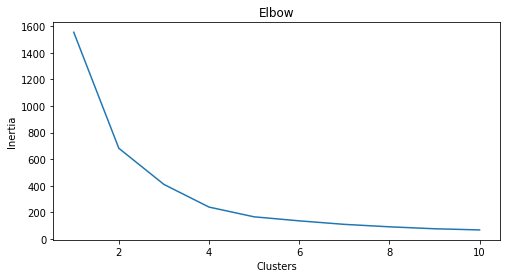

In [31]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [32]:
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# # Menambah Label pada data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (Two or More Races),All Students (2016),cluster_kmeans3,cluster_kmeans4
0,-0.293119,-0.396208,-0.501567,-0.428746,-0.435548,-0.464537,0,1
1,-0.271446,-0.357183,-0.468635,-0.382250,-0.395796,-0.423333,0,1
2,-0.260448,-0.337670,-0.452487,-0.360937,-0.384438,-0.403996,0,1
3,-0.261811,-0.338654,-0.449444,-0.364930,-0.393458,-0.405025,0,1
4,-0.293026,-0.393545,-0.492975,-0.433400,-0.457930,-0.463580,0,1
...,...,...,...,...,...,...,...,...
254,-0.162619,-0.362626,0.794854,0.575523,0.849894,0.675555,0,0
255,-0.190484,-0.374958,0.601073,0.683238,0.798116,0.655560,0,0
256,-0.247693,-0.390650,0.176332,0.381553,0.270643,0.297987,0,1
257,0.163098,-0.195175,3.683517,3.333216,3.914512,3.519261,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


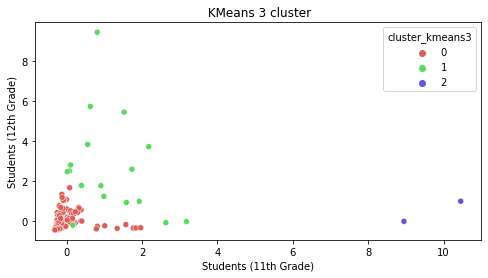

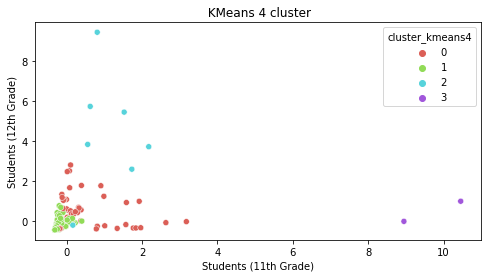

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Students (11th Grade)'], data_cluster['Students (12th Grade)'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Students (11th Grade)'], data_cluster['Students (12th Grade)'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

In [39]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [40]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (Two or More Races),All Students (2016),cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids
0,-0.293119,-0.396208,-0.501567,-0.428746,-0.435548,-0.464537,0,1,2
1,-0.271446,-0.357183,-0.468635,-0.382250,-0.395796,-0.423333,0,1,1
2,-0.260448,-0.337670,-0.452487,-0.360937,-0.384438,-0.403996,0,1,1
3,-0.261811,-0.338654,-0.449444,-0.364930,-0.393458,-0.405025,0,1,1
4,-0.293026,-0.393545,-0.492975,-0.433400,-0.457930,-0.463580,0,1,2
...,...,...,...,...,...,...,...,...,...
254,-0.162619,-0.362626,0.794854,0.575523,0.849894,0.675555,0,0,3
255,-0.190484,-0.374958,0.601073,0.683238,0.798116,0.655560,0,0,3
256,-0.247693,-0.390650,0.176332,0.381553,0.270643,0.297987,0,1,0
257,0.163098,-0.195175,3.683517,3.333216,3.914512,3.519261,1,2,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


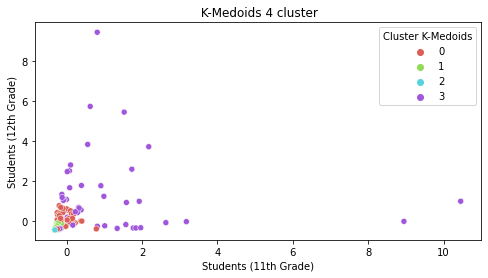

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Students (11th Grade)'], data_cluster['Students (12th Grade)'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()


**Hierarchy**

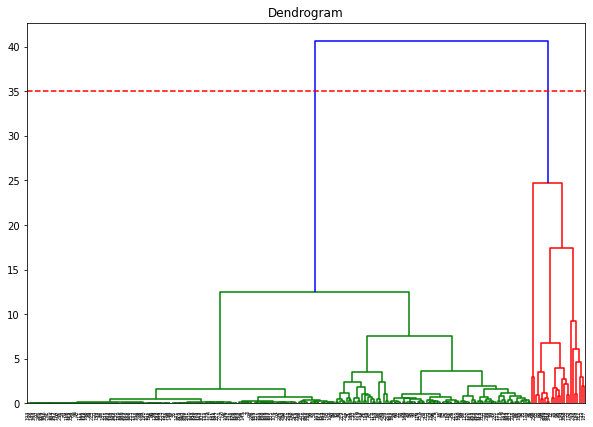

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=35, color='r', linestyle='--')

Text(0.5, 1.0, 'Hierarchy')

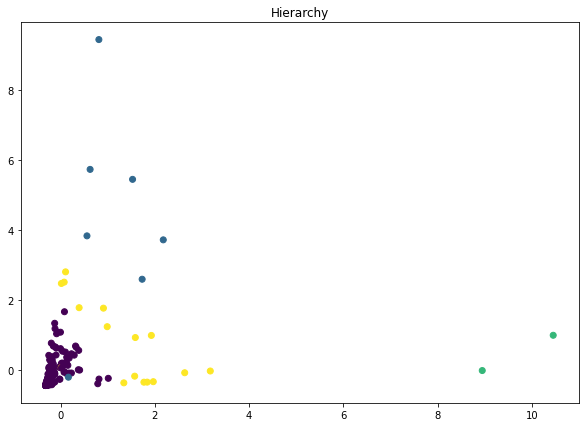

In [43]:
from sklearn.cluster import AgglomerativeClustering

model_agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(data)
plt.figure(figsize=(10,7))
plt.scatter(data_cluster['Students (11th Grade)'], data_cluster['Students (12th Grade)'], c=model_agglo.labels_)
plt.title('Hierarchy')

**DBSCAN**

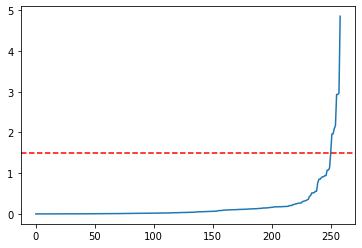

In [44]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')

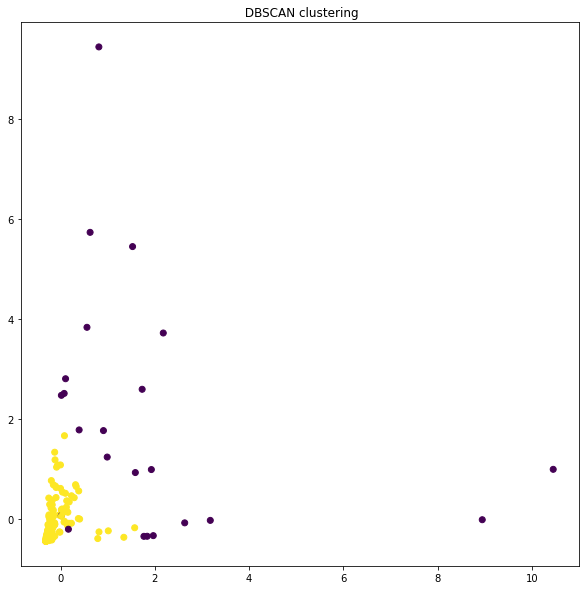

In [45]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1.5, min_samples=13)
model_dbscan.fit(data)

plt.figure(figsize=(10,10))
plt.scatter(data_cluster['Students (11th Grade)'], data_cluster['Students (12th Grade)'], c=model_dbscan.labels_)
plt.title(' DBSCAN clustering')
plt.show()